/tmp/ipykernel_66773/1881572258.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')


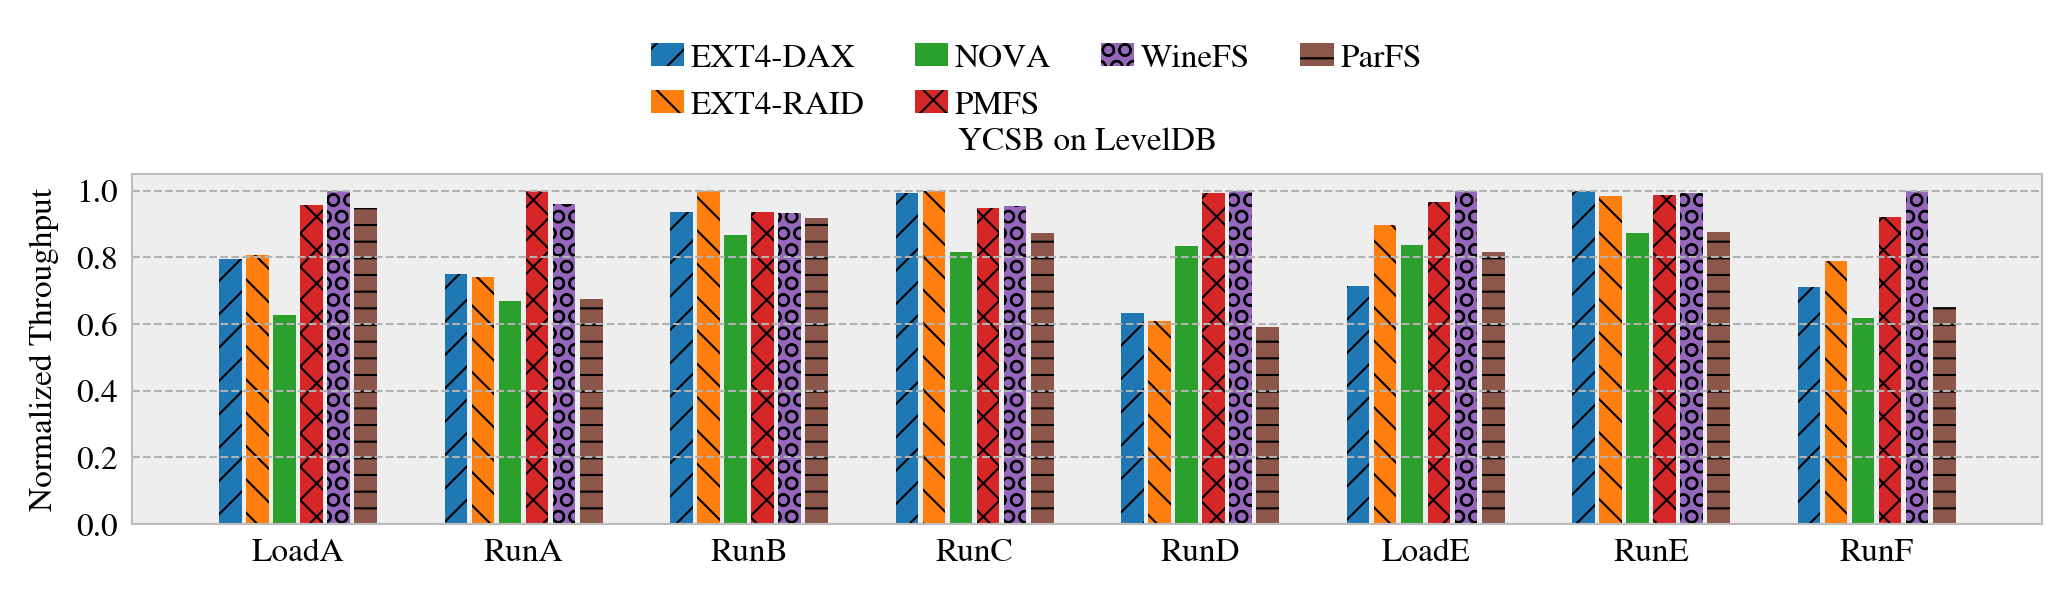

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams['grid.linestyle'] = "--"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
with open("./performance-comparison-table-store-8", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4.5)))
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[3, 2])

bar_width = 0.12
true_bar_width = 0.1
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

fss = df['fs'].drop_duplicates().reset_index().drop(columns=['index'])['fs']
mapping = {
    "nova":"NOVA",
    "pmfs":"PMFS",
    "ext4-dax":"EXT4-DAX",
    "ext4-raid":"EXT4-RAID",
    "winefs":"WineFS",
    "odinfs-12":"OdinFS",
    "parfs-12":"ParFS",
}
mapped_fss = [mapping.get(item, item) for item in fss]
workloads = [ "loada(micros/op)", "runa(micros/op)", "runb(micros/op)", "runc(micros/op)", "rund(micros/op)", "loade(micros/op)", "rune(micros/op)", "runf(micros/op)" ]
workloads_name_remap = ["LoadA", "RunA", "RunB", "RunC", "RunD", "LoadE", "RunE", "RunF"]
tot = len(fss) * bar_width
cmap = "tab10"
x = list(range(1, len(workloads) + 1))
# num_threads = [1]
# for thread in num_threads:
for workload in workloads:
    value = df[workload] / df[workload].min()
    df[workload] = value

# for fig_idx in range(0, len(num_threads)):
# subfig = plt.subplot(1, 1, 1)
subfig = plt.subplot()
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    bws = []
    for workload in workloads:
        bws.append(1 / df[(df['fs'] == fs)][workload].iloc[0])
    
    plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    # Draw title
    plt.xticks(x, labels=workloads_name_remap, fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    # if fig_idx == 0:
    plt.ylabel('Normalized Throughput', fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
plt.title("YCSB on LevelDB", fontsize=8)
legend_labels = mapped_fss
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8, frameon=False, columnspacing=1.5, handletextpad=0.2, handlelength=1)

plt.tight_layout()
plt.savefig("./FIG-RealWorld.pdf", bbox_inches='tight', pad_inches=0)


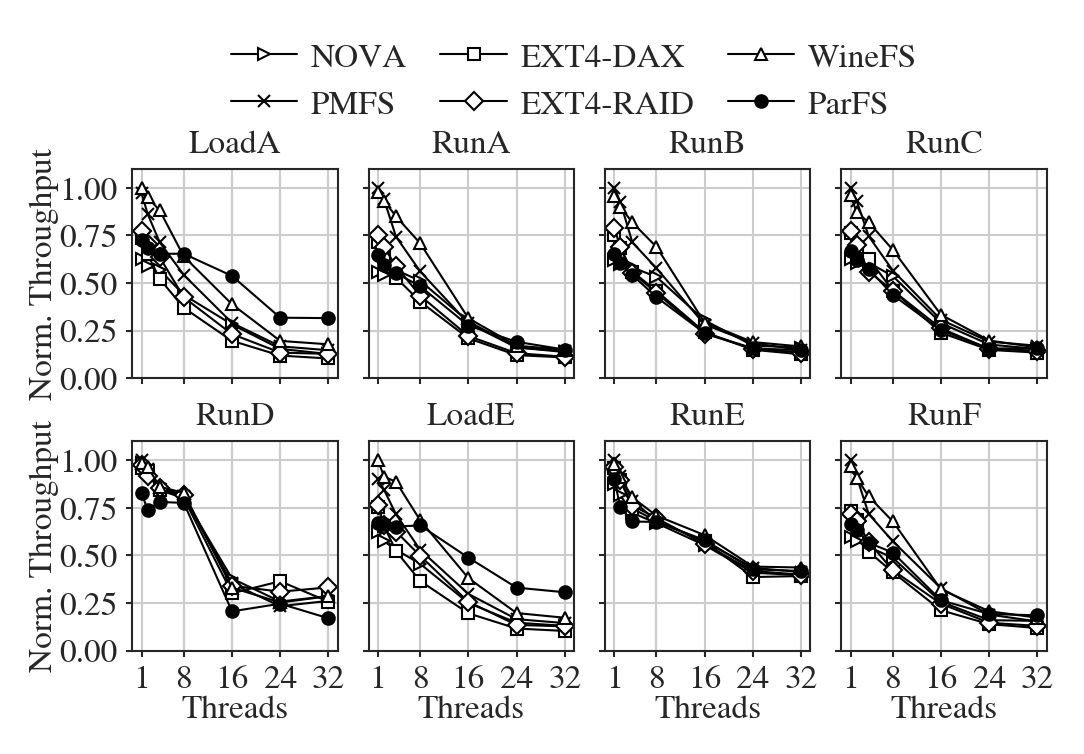

In [9]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH

def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-v0_8-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["font.size"] = 8
pd.options.display.max_columns = None
pd.options.display.max_rows = None

with open("./performance-comparison-table-store", "r") as f:
    df = pd.read_csv(f, index_col=None, engine='python', sep=' ')

# 调整画布尺寸以适应8个子图
fig = plt.figure(dpi=300, figsize=(cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(6)))

colors = ['white', 'white', 'white', 'white', 'white', 'black']
marks = [">", "x", "s", "D", "^", "o"]
workloads = ["loada(micros/op)", "runa(micros/op)", "runb(micros/op)", "runc(micros/op)",
             "rund(micros/op)", "loade(micros/op)", "rune(micros/op)", "runf(micros/op)"]
workloads_name_remap = ["LoadA", "RunA", "RunB", "RunC", "RunD", "LoadE", "RunE", "RunF"]
fss = ["nova", "pmfs", "ext4-dax", "ext4-raid", "winefs", "parfs-12"]
num_jobs = [1, 2, 4, 8, 16, 24, 32]
x = list(num_jobs)

mapping = {
    "nova": "NOVA",
    "pmfs": "PMFS",
    "ext4-dax": "EXT4-DAX",
    "ext4-raid": "EXT4-RAID",
    "winefs": "WineFS",
    "parfs-12": "ParFS",
}
mapped_fss = [mapping.get(item, item) for item in fss]

# 性能计算修正
for workload in workloads:
    df[workload] = 1e6 / df[workload]  # 转换为op/s
    max_tput = df[workload].max()
    df[workload] = df[workload] / max_tput  # 标准化

lines = []
for i in range(len(workloads)):
    ax = plt.subplot(2, 4, i+1)
    workload = workloads[i]
    
    # 添加子图标题（新增部分）
    plt.title(workloads_name_remap[i], fontsize=8, pad=4)  # pad调整标题间距
    
    # 数据绘制
    for idx, fs in enumerate(fss):
        y = df[(df['fs'] == fs)][workload].iloc[:len(num_jobs)]
        p, = plt.plot(x, y, color="black", markerfacecolor=colors[idx], 
                     linewidth=0.5, label=fs, marker=marks[idx],
                     markeredgecolor="black", markersize=3, markeredgewidth=0.5)
        if i == 0:
            lines.append(p)

    # 坐标轴设置
    xlabelpad = -0.01
    ytick = [0, 0.25, 0.5, 0.75, 1]
    
    # 左侧子图显示y轴标签
    if i % 4 == 0:
        plt.ylabel('Norm. Throughput', labelpad=xlabelpad)
        plt.yticks(ytick)
    else:
        plt.yticks(ytick, labels=[])

    # 底部子图显示x轴标签
    if i >= 4:
        plt.xlabel("Threads", labelpad=xlabelpad)
        plt.xticks([1, 8, 16, 24, 32], labels=[1, 8, 16, 24, 32])
    else:
        plt.xticks([1, 8, 16, 24, 32], labels=[])

    plt.ylim(0, 1.1)
    
    # 统一刻度设置
    ax.tick_params(axis='both', which='major', direction='out',
                  length=1.5, width=0.5, pad=2)
    
    # 边框线宽设置
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

# 调整图例位置（新增标题后需要适当下移）
fig.legend(lines, mapped_fss, loc='upper center', 
          bbox_to_anchor=(0.5, 1.02),  # 从1.05调整到1.02
          ncol=3, columnspacing=1, 
          handletextpad=0.4, frameon=False, 
          fontsize=8)

# 调整子图间距（新增标题后需要增加顶部空间）
plt.subplots_adjust(left=0.08, right=0.95, 
                   top=0.8,  # 从0.85调整到0.88
                   bottom=0.12,
                   hspace=0.3,  # 增加垂直间距
                   wspace=0.15)

plt.savefig("./Leveldb.pdf", bbox_inches='tight', pad_inches=0.02)